# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [31]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

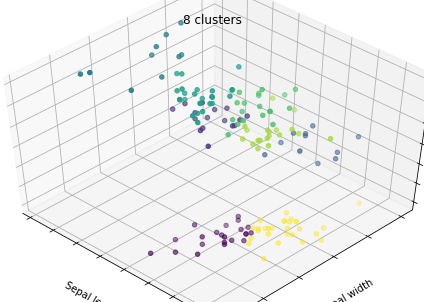

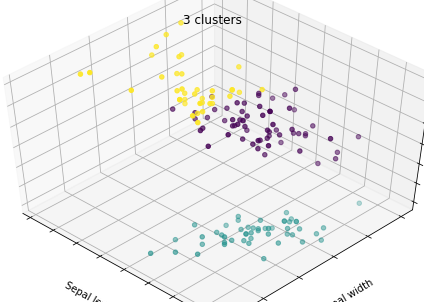

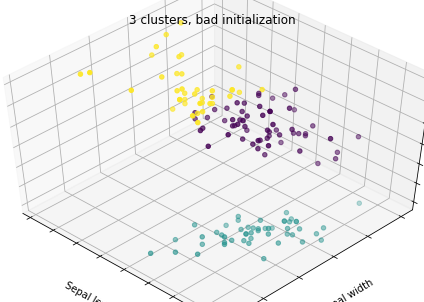

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

estimators = [KMeans(n_clusters=8), KMeans(n_clusters=3), KMeans(n_clusters=3, n_init=1, init='random')]

fignum=0
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for est in estimators:
    fig = plt.figure(fignum,)
    ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
    
    est.fit(X)
    laber = est.labels_
    
    ax.scatter(X[:,0], X[:,1], X[:,2], c=laber, )
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_zlabel('Petal length')
    ax.dist = 8
    ax.set_title(titles[fignum])
    fignum += 1
    

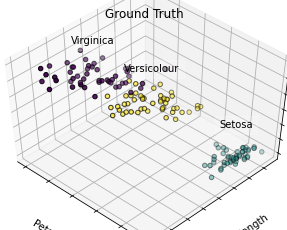

In [33]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 8